In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
file_path = r"c:\Users\user\Downloads\Billionaire dataset.xlsx"
df = pd.read_excel(file_path)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age'])

In [9]:
fig = px.histogram(df, x='Age', nbins=20, title='Age Distribution of Billionaires',
                   labels={'Age': 'Age'}, color_discrete_sequence=['skyblue'])
fig.update_layout(bargap=0.1)
fig.show()


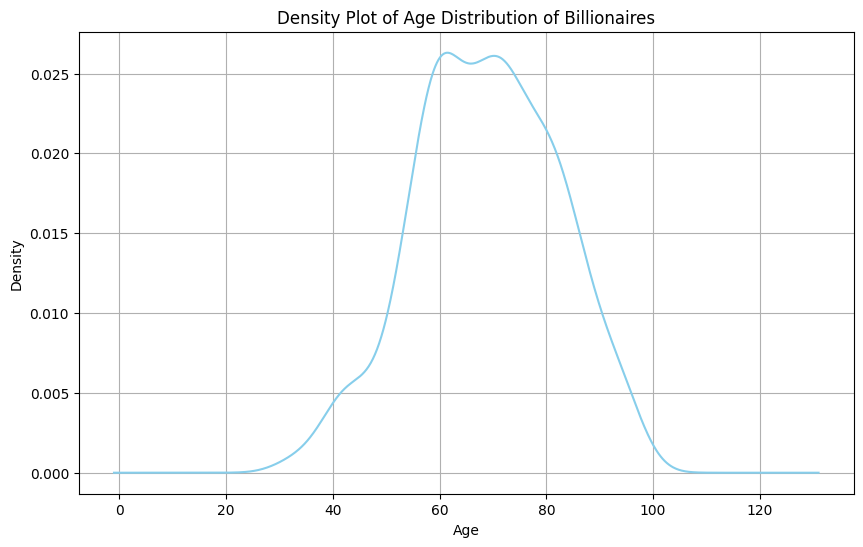

In [4]:
plt.figure(figsize=(10,6))
df['Age'].plot(kind='density', color='skyblue')
plt.xlabel('Age')
plt.title('Density Plot of Age Distribution of Billionaires')
plt.grid(True)
plt.show()


In [5]:
age_group = df[(df['Age'] >= 50) & (df['Age'] <= 60)]
pivot_table_sources = age_group.pivot_table(index='Source', columns='Self Made', values='Person Name', aggfunc='count', fill_value=0)
pivot_table_sources['Total'] = pivot_table_sources.sum(axis=1)
top_10_sources = pivot_table_sources['Total'].nlargest(10).index
top_10_pivot_table = pivot_table_sources.loc[top_10_sources]
top_10_pivot_table = top_10_pivot_table.drop(columns='Total')

fig = px.bar(top_10_pivot_table, barmode='group',
             title='Top 10 Wealth Sources for Billionaires Aged 50-60',
             labels={'value': 'Number of Billionaires', 'Source': 'Wealth Source'},
             color_discrete_sequence=['skyblue', 'lightcoral'])

fig.update_layout(bargap=0.1, xaxis_title='Wealth Source', yaxis_title='Number of Billionaires')
fig.show()

In [8]:
pivot_table_industries = age_group.pivot_table(index='Industries', columns='Self Made', values='Person Name', aggfunc='count', fill_value=0)
pivot_table_industries['Total'] = pivot_table_industries.sum(axis=1)
top_10_industries = pivot_table_industries['Total'].nlargest(10).index
top_10_pivot_table = pivot_table_industries.loc[top_10_industries].drop(columns='Total')

fig = px.bar(top_10_pivot_table, barmode='group',
             title='Top 10 Industries for Billionaires Aged 50-60',
             labels={'value': 'Number of Billionaires', 'Industries': 'Industry'},
             color_discrete_sequence=['skyblue', 'lightcoral'])
fig.update_layout(bargap=0.1, xaxis_title='Industry', yaxis_title='Number of Billionaires')
fig.show()



In [7]:
growth_trend = age_group.groupby(['Birth Year', 'Self Made']).size().unstack(fill_value=0)


fig = px.line(growth_trend, title='Growth of Billionaires Aged 50-60 Over Time',
              labels={'value': 'Number of Billionaires', 'Birth Year': 'Birth Year'},
              color_discrete_sequence=['skyblue', 'lightcoral'])
fig.update_layout(bargap=0.1)
fig.show()
